## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

**Wybrałem metodę BBHE.**

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/jet.bmp --no-check-certificate

image = cv2.imread('jet.bmp')
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).

3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum.

In [2]:
lm = int(np.mean(image))
lm

178

4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.

In [3]:
hist1 = hist[:lm+1]
hist1 /= hist1.max()

hist2 = hist[lm+1:]
hist2 /= hist2.max()

5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.

In [4]:
hist_cumsum1 = hist1.cumsum()
hist_cumsum1 /= hist_cumsum1.max()
hist_cumsum1 *= lm
hist_cumsum1 = hist_cumsum1.astype('uint8')

hist_cumsum2 = hist2.cumsum()
hist_cumsum2 /= hist_cumsum2.max()
hist_cumsum2 *= (255 - lm - 1) + lm + 1
hist_cumsum2 = hist_cumsum2.astype('uint8')


lut = np.concatenate([hist_cumsum1, hist_cumsum2])

6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [5]:
def equalize(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_cumsum = hist.cumsum().astype('int')
    
    lut = (hist_cumsum/hist_cumsum.max() * 255).astype('uint8')
    
    return cv2.LUT(image, lut)

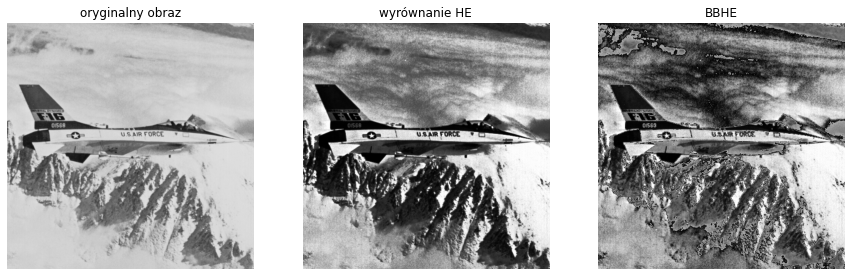

In [6]:
equalized = cv2.LUT(image, lut)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for axis in ax: 
    axis.axis('off')


ax[0].imshow(image)
ax[0].set_title("oryginalny obraz")

ax[1].imshow(equalize(image))
ax[1].set_title("wyrównanie HE")

ax[2].imshow(equalized)
ax[2].set_title("BBHE")

plt.show()